import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline 
import scaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score



In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score


In [ ]:
dataset=pd.read_csv("flightdata.csv")

dataset.info()



# New Section

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [ ]:
data=pd.read_csv("flightdata.csv")
dataset.head()


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [ ]:
dataset=dataset.drop('Unnamed: 25',axis=1)
dataset.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [ ]:
#filter the dataset to clininate colums that aren't relevant to a predictive model.
dataset=dataset[["FL_NUM","MONTH","DAY_OF_MONTH","DAY_OF_WEEK","ORIGIN","DEST","CRS_ARR_TIME"]]
dataset.isnull().sum()

FL_NUM          0
MONTH           0
DAY_OF_MONTH    0
DAY_OF_WEEK     0
ORIGIN          0
DEST            0
CRS_ARR_TIME    0
dtype: int64

In [ ]:
sns.scatterplot(x='ARR_DELAY',Y='ARR_DEL15',data=flight_data)


In [ ]:
import math
for index,row in dataset.iterrows():
  dataset.loc[index,'CRS_ARR_TIME']=math.floor(row['CRS-ARR_TIME']/100)
  dataset.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['DEST']=le.fit_transform(dataset['DEST'])
dataset['ORIGIN']=le.fit_transform(dataset['ORIGIN'])
odataset.head(5)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,0,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,1,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,0,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,4,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,4,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [ ]:
dataset['ORIGIN'].unique()
array([0,1,4,3,2])
dataset=pd.get_dummies(dataset,columns=['ORIGIN','DEST'])
dataset.head()
X=dataset.iloc[:,0:8].values
Y=dataset.iloc[:,8:9].values
x

In [ ]:
from sklearn.preprocessing import OneHotEncoder
oh= OneHotEncoder()
z= oh.fit_transform(x[:,4:5]).toarray()
t= oh.fit_transform(x[:,5:6]).toarray()
z
t



In [ ]:
flight_data.describe()

In [ ]:
sns.distplot(flight_data.MONTH)

In [ ]:
## Decision tree
y_pred = classifier.predict([[129,99,1,0,0,1,0.1,1,1,0,1,1,1,1,1]])
print(y_pred)
(y_pred)




In [ ]:
## RandomForest
y_

In [ ]:
from seaborn.axisgrid import FacetGrid
sns.catplot(x"ARR_del15",y="ARR_DELAY",kind='bar',data=flight_data)
<seaborn.axisgrid.FacetGrid at 0x22716099eb0>

<Axes: >

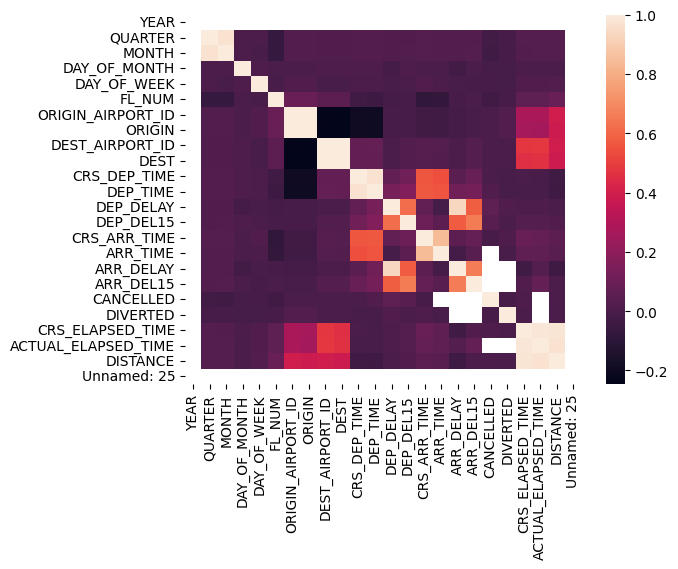

In [ ]:
sns.heatmap(dataset.corr())





In [ ]:
# Testing the model
y_pred = classification.predict(x_test)

In [ ]:
from sklearn.preprocessing import standardScaler
sc= standardScaler()
x_train= sc.fit_transform(x_train)
x_test = sc.transform(x_test)
                    

In [ ]:
from IPython.utils.text import columnize
from sklearn.metrics.pairwise import DataConversionWarning
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy')
rfc.fit(x_train,y_train)
<ipython-input-125-b87bb2ba9825>:1:DataConversionWarning:A column-vector y warning
ravel().
rfc.fit(x_train,y_train)
RandomForestClassifier(criterion='entropy',n_estimates=10)
y_predict = rfc.predict(x_test)

                  

In [ ]:
 #creating NN skleton view
classification = sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(22,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))

In [ ]:
# complling the ANN model
classification.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Trainig the model
classification.fit(x_train,y_train,batch_size=4,validation_split=0.2,epochs=100)


In [ ]:
## RandomForest
y_pred = rfc.predict([[129,99,1,0,0,1,1,1,0,1,1,1,1,1]])
print(y_pred)
(y_pred)

In [ ]:
def predict_exit(sample_value):
 # covert list to numpy array
 sample_value = np.array(sample_value)
#Reshape because sample_value contains only 1 record
sample_value = sample_value.reshape(1,-1)
#Feature Scaling
sample_value = sc.transform(sample_value)
return classifier.predict(sample_value)


In [ ]:
test=classification.predict([[1,1,121.000000,36.0,0,0,1,0,1,1,1,1,1,1,1,1]])
if test==1:
 print('Prediction: chance of delay')
else:
  print('Prediction: no chane of delay.')


In [ ]:
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy')


In [7]:
#importing the necessary dependencies
from flask import Flask,request,render_template
import numpy as np
import pandas as pd 
import pickle 
import os


In [ ]:
dfs=[]
models=[
   ('RF',RandomForestClassifier()),
   ('DecisionTree' ,DecisionTreeClassifier()),
   ('ANN',MLPClassifier())
]
results = []
 names = []
 scoring = ['accuracy','precision_weighted', 'recall_weghted', 'f1_weighted', 'roc_auc']
 target_names = ['no delay', 'delay']
 for name,model in models:
      kflod= model_selection.kfold(n_splits=5, shuffle=True, radom_state=90210)
      cv_results=model_selection.cross_validate(model, x_train, y_train,cv=kfold, scoring=scoring
      clf=model.fit(x_train,y_train)
      y_pred = clf.predict(x_test)
      print(name)
      print(classification_report(y_test, y_pred, target_names=target_names))
      results.appnd(cv_results)
      names.append(name)
      this_df=pd.DataFrame(cv_results)
      this_df['model']=name
      dfs.append(this_df)
final=pd.oncat(dfs, ignore_indext=true)
return final


In [ ]:
sns.catplot(x="ARR_DEL15",y="ARR_DELAY",kind='bar',data=flight_data)

In [ ]:
model = pickle.load(open('flight.pkl' , 'rb'))
app = Flask(_name_) #initializing the app


In [ ]:
# giving some parameters that can be use in randized search cv
parameters={
            'n_estimators' : [1,2,30,55,68,74,90,120,115],
            'criterion' : ['gini' , 'entropy'],
            'max_features' : ["auto" , "sqrt", "log2"],
      'max_depth' : [2,5,8,10] 'verbose' :[1,2,3,4,6,,8,9,10]
}


In [ ]:
#performing the randomized cv
RCV = RandomizedSearchCV(estimator=rf,param_distributions=parameters,cv=10,n_iter=4)


In [ ]:
def predict():
  name = request.form['name']
  month = request.form['month']
  dayofmonth=request.form['dayofmonth']
  dayofweek =request.form['dayofweek']
  origin = request.form['origin']
if(origin == "msp"):
  origin1,origin2,origin3,origin4,origin5 = 0,0,0,0,1
if(origin == "dtw"):
  origin1,origin2,origin3,origin4,origin5 = 1,0,0,0,0
if(origin == "jfk"):
  origin1,origin2,origin3,origin4,origin5 = 0,0,1,0,0
if(origin == "sea"):
  origin1,origin2,origin3,origin4,origin5 = 0,1,0,0,0
if(origin == "alt"):
  origin1,origin2,origin3,origin4,origin5 = 0,0,0,1,0


  

In [ ]:
destination = request.form['destination']
if(destination == 'msp'):
  destination1,destination2,destination3,destination4,destination5 = 0,0,0,0,1
if(destination == "dtw"):
  destination1,destination2,destination3,destination4,destination5  = 1,0,0,0,0
if(origin == "jfk"):
 destination1,destination2,destination3,destination4,destination5  = 0,0,1,0,0
if(origin == "sea"):
  destination1,destination2,destination3,destination4,destination5  = 0,1,0,0,0
if(origin == "alt"):
 destination1,destination2,destination3,destination4,destination5  = 0,0,0,1,0
 dept = request.form['dept']
 arrtime = request.form['arrtime']
 actdept = request.form['actdept']
 deptl5=int(dept)-int(actdept)
 total =[[name,month,daofmonth,dayofweek,origin,origin2,origin3,origin4,origin5,destination1,destination2,destination3,destination4,destination5]]
 #print(total)
 y_pred = model.predict(total)
print(y_pred)
if(y_pred==[0.]):
  ans="The Flight will be on time"
else:
   ans="The Filght will be delayed"
return render_template("index.html",showcase = ans)

In [ ]:
if _name_=='_main_':
  app.run(debug = True)